<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
# Importing Basic Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import os

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.metrics import r2_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

# 1. Load the data from file
---

In [31]:
# Loading Iowa Liquor Dataset
iowa_path = '/home/dsi-student/Desktop/ECON628-01/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_path)

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
# Head of Dataset
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
# Tail of Dataset
iowa.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,$20.30,$30.45,4,$121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,$7.47,$11.21,3,$33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.60,0.42


In [5]:
# Description of Dataset
iowa.describe()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [6]:
# Data Types of Dataset
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
# Info of Dataset
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [8]:
# Correlation of Dataset
iowa.corr()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
Store Number,1.000000,0.007510,-0.012111,-0.004533,-0.026386,-0.063475,0.014422,-0.017696,-0.017686
County Number,0.007510,1.000000,-0.006336,0.001746,0.006810,-0.027694,0.018945,0.010199,0.010208
Category,-0.012111,-0.006336,1.000000,0.091920,0.116385,-0.009294,-0.000208,-0.004375,-0.004367
Vendor Number,-0.004533,0.001746,0.091920,1.000000,0.136120,0.024561,-0.002116,-0.007432,-0.007428
Item Number,-0.026386,0.006810,0.116385,0.136120,1.000000,-0.057282,-0.004766,-0.009555,-0.009545
Bottle Volume (ml),-0.063475,-0.027694,-0.009294,0.024561,-0.057282,1.000000,-0.012476,0.156258,0.156090
Bottles Sold,0.014422,0.018945,-0.000208,-0.002116,-0.004766,-0.012476,1.000000,0.883348,0.883378
Volume Sold (Liters),-0.017696,0.010199,-0.004375,-0.007432,-0.009555,0.156258,0.883348,1.000000,1.000000
Volume Sold (Gallons),-0.017686,0.010208,-0.004367,-0.007428,-0.009545,0.156090,0.883378,1.000000,1.000000


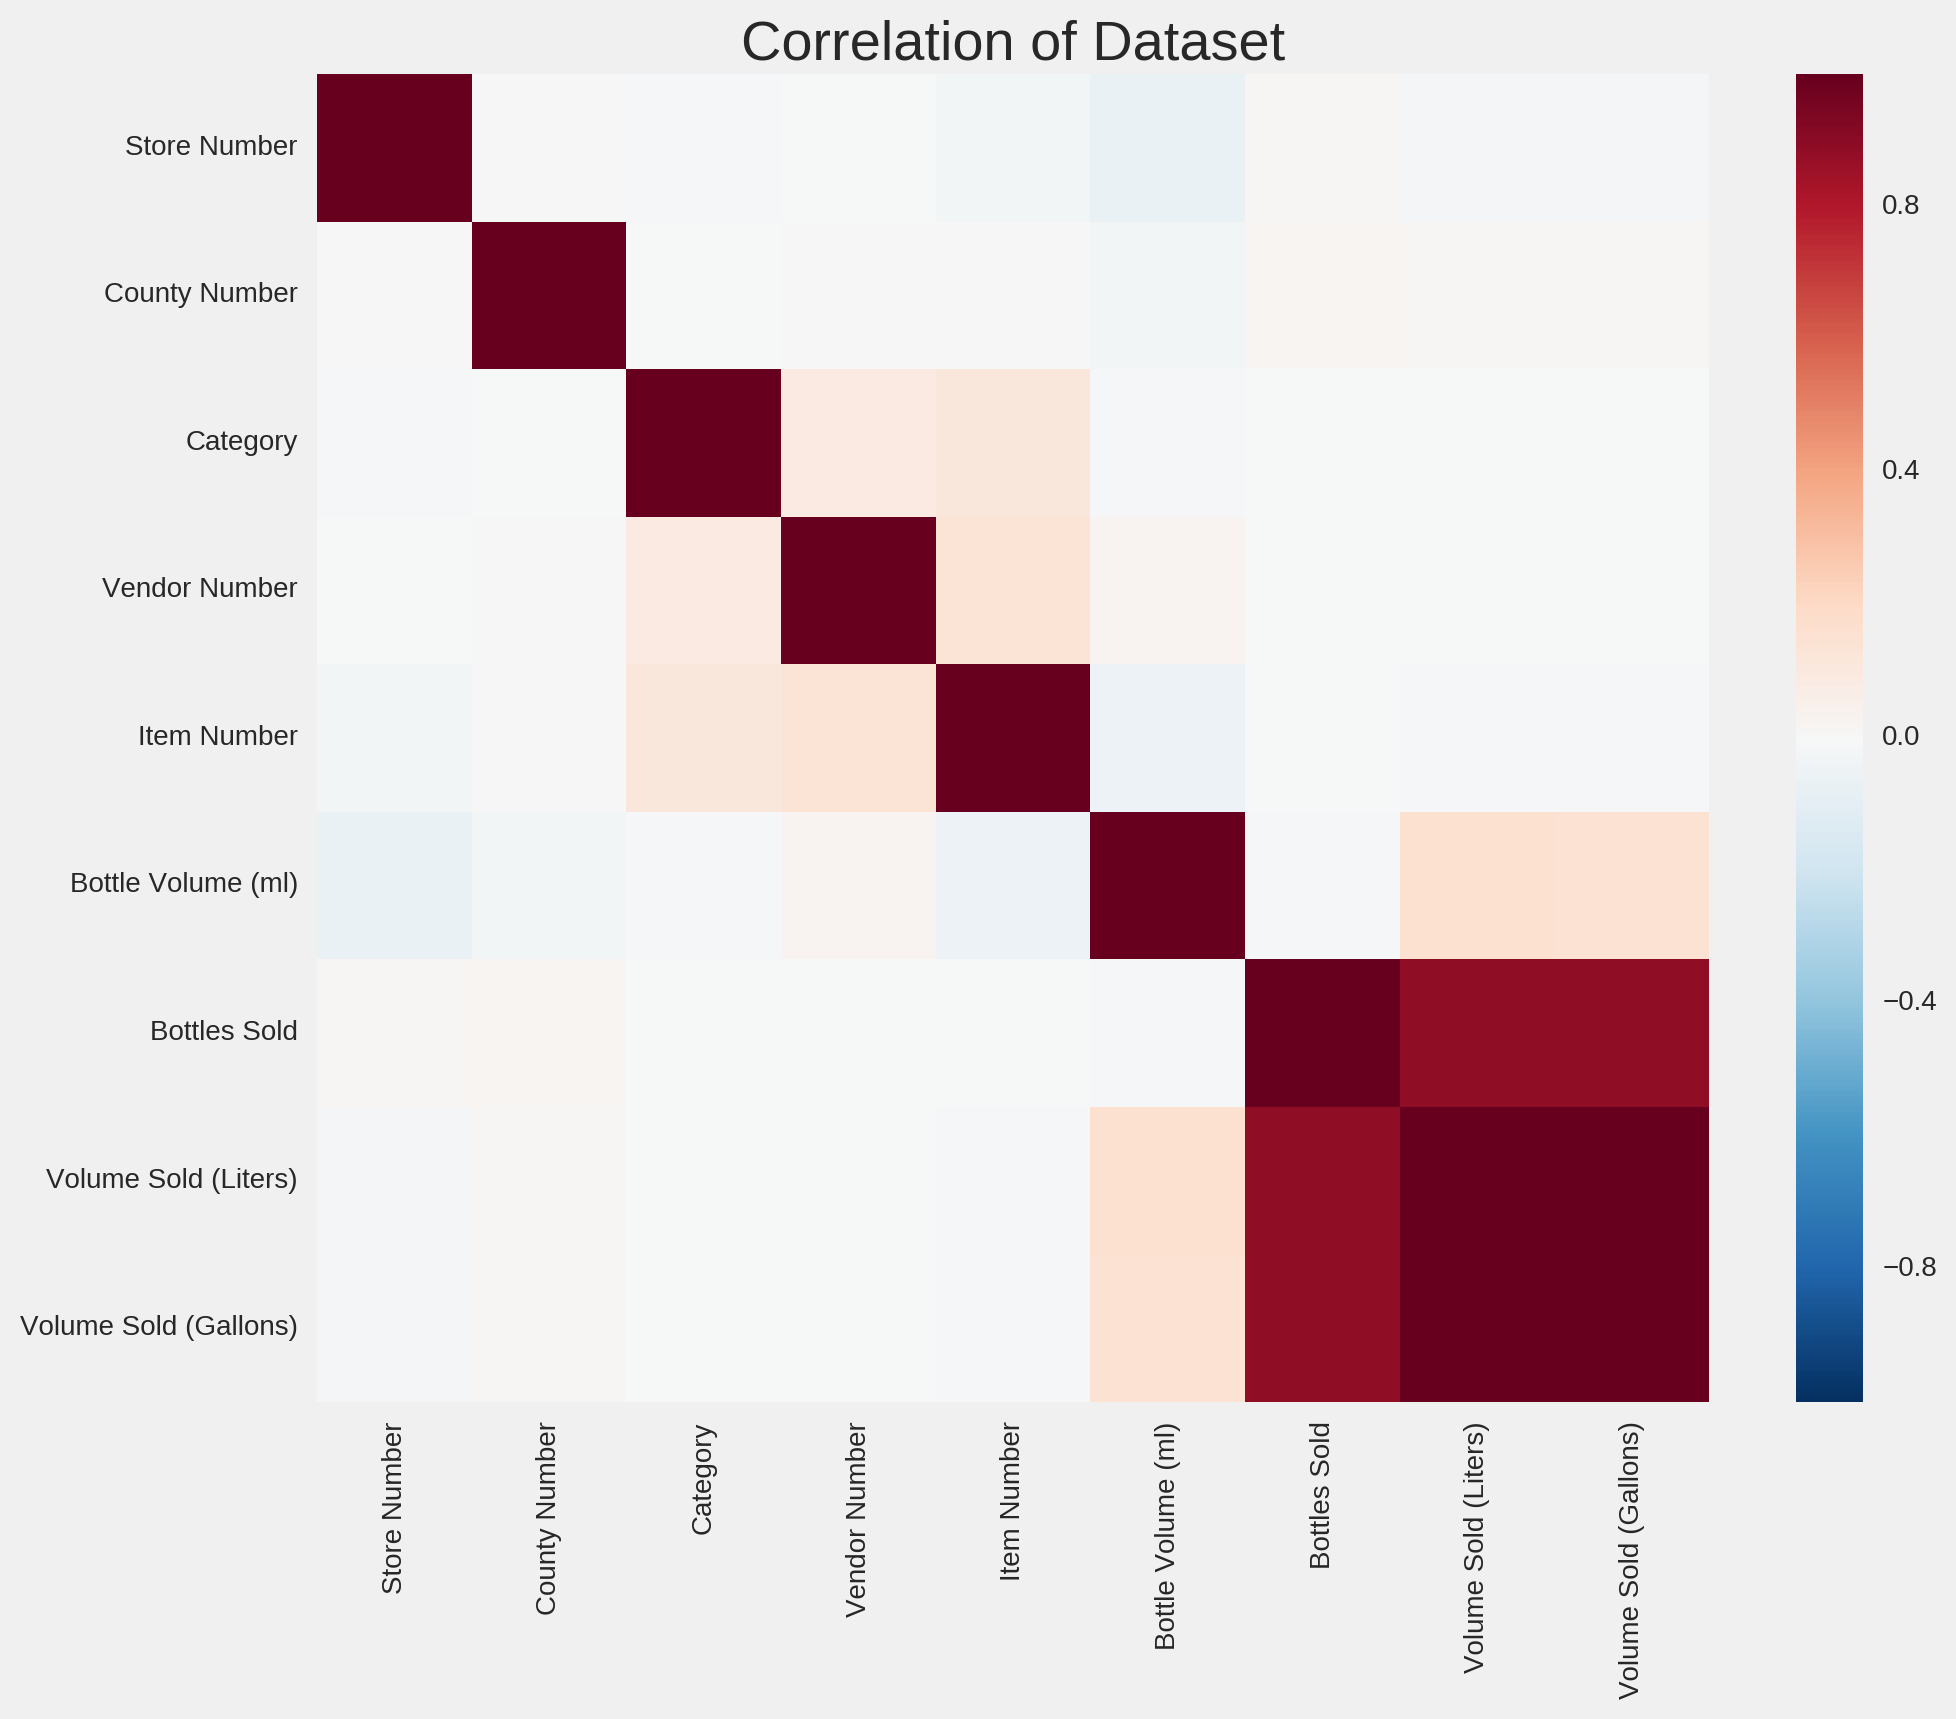

In [9]:
# Correlation Heat Map of Dataset
iowa.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title('Correlation of Dataset')
sns.heatmap(iowa.corr(), ax=ax)
plt.show()


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [32]:
# Renaming Dataset Columns
iowa.columns = ['date', 'store', 'city', 'zip', 'countynum', 'countyname', 'categorynum', 'categoryname', 'vendornum', 'itemnum', 'itemdes', 'bottlevolumeml', 'statebottlecost', 'statebottleretail', 'bottlessold', 'saledollars', 'volumesoldliters', 'volumesoldgallons']

# Checking for Null/Missing Values
iowa.isnull().sum(axis=0)

date                    0
store                   0
city                    0
zip                     0
countynum            1077
countyname           1077
categorynum            68
categoryname          632
vendornum               0
itemnum                 0
itemdes                 0
bottlevolumeml          0
statebottlecost         0
statebottleretail       0
bottlessold             0
saledollars             0
volumesoldliters        0
volumesoldgallons       0
dtype: int64

In [11]:
# Looking at the dataframe, I will convert the date column into three columns; month, day, and year. Using
# the month column, I will create a column for quarter; Q1, Q2, Q3, and Q4. For store number and city, I 
# decided not to do anything as I will work with the county variable mostly. For zip code, there is one entry
# that can be cleaned, but again I decided not to do anything as I will work with the county variable. For
# county number and county name, there is an equal number of missing values. In fixing this problem, I will 
# replace the missing values of county name with the actual name of the county which I found using the zip 
# codes. For category number and category name, I wouldn't be able to replace these. However, when I create
# the variable for broader category, I will use the item description to determine the broader category type.
# For vendor number, this is information I do not need. As mentioned, I will use item description to create
# the broader category for observations where category number and category name are missing. For bottle
# volume, bottles sold, volume sold in liters, and volume sold in gallons, these are already in formats that
# I can work with. For state bottle cost, state bottle retail, and sales in dollars, I will remove the 
# dollar sign. There were outliers for sale dollars and volume sold but I chose not to drop these are 
# observations I want to have accounted for. 

### 3.2 Clean the columns

In [33]:
# Removing Dollar Signs
iowa['statebottlecost'] = iowa['statebottlecost'].str.replace('$', '').astype(float)
iowa['statebottleretail'] = iowa['statebottleretail'].str.replace('$', '').astype(float)
iowa['saledollars'] = iowa['saledollars'].str.replace('$', '').astype(float)

In [34]:
# Replacing the missing County Names based on Zip Codes
iowa.loc[iowa.zip == '50009', 'countyname'] = 'Polk'
iowa.loc[iowa.zip == '50022', 'countyname'] = 'Cass'
iowa.loc[iowa.zip == '50025', 'countyname'] = 'Audubon'
iowa.loc[iowa.zip == '50049', 'countyname'] = 'Lucas'
iowa.loc[iowa.zip == '50211', 'countyname'] = 'Warren'
iowa.loc[iowa.zip == '50213', 'countyname'] = 'Clarke'
iowa.loc[iowa.zip == '50225', 'countyname'] = 'Marion'
iowa.loc[iowa.zip == '50237', 'countyname'] = 'Polk'
iowa.loc[iowa.zip == '50317', 'countyname'] = 'Polk'
iowa.loc[iowa.zip == '50401', 'countyname'] = 'Cerro Gordo'
iowa.loc[iowa.zip == '50421', 'countyname'] = 'Wright'
iowa.loc[iowa.zip == '50441', 'countyname'] = 'Franklin'
iowa.loc[iowa.zip == '50469', 'countyname'] = 'Cerro Gordo'
iowa.loc[iowa.zip == '50483', 'countyname'] = 'Kossuth'
iowa.loc[iowa.zip == '50501', 'countyname'] = 'Webster'
iowa.loc[iowa.zip == '50601', 'countyname'] = 'Hardin'
iowa.loc[iowa.zip == '50677', 'countyname'] = 'Bremer'
iowa.loc[iowa.zip == '50703', 'countyname'] = 'Black Hawk'
iowa.loc[iowa.zip == '50707', 'countyname'] = 'Black Hawk'
iowa.loc[iowa.zip == '51103', 'countyname'] = 'Woodbury'
iowa.loc[iowa.zip == '51241', 'countyname'] = 'Lyon'
iowa.loc[iowa.zip == '51537', 'countyname'] = 'Shelby'
iowa.loc[iowa.zip == '51632', 'countyname'] = 'Page'
iowa.loc[iowa.zip == '51653', 'countyname'] = 'Fremont'
iowa.loc[iowa.zip == '52003', 'countyname'] = 'Dubuque'
iowa.loc[iowa.zip == '52136', 'countyname'] = 'Howard'
iowa.loc[iowa.zip == '52205', 'countyname'] = 'Jones'
iowa.loc[iowa.zip == '52241', 'countyname'] = 'Johnson'
iowa.loc[iowa.zip == '52317', 'countyname'] = 'Johnson'
iowa.loc[iowa.zip == '52358', 'countyname'] = 'Cedar'
iowa.loc[iowa.zip == '52402', 'countyname'] = 'Linn'
iowa.loc[iowa.zip == '52404', 'countyname'] = 'Linn'
iowa.loc[iowa.zip == '52590', 'countyname'] = 'Wayne'
iowa.loc[iowa.zip == '52591', 'countyname'] = 'Keokuk'
iowa.loc[iowa.zip == '52732', 'countyname'] = 'Clinton'
iowa.loc[iowa.zip == '52802', 'countyname'] = 'Scott'
iowa.loc[iowa.zip == '52804', 'countyname'] = 'Scott'


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

# ## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [35]:
# Create a variable calculating per bottle profit
iowa['statebottleprofit'] = iowa['statebottleretail'] - iowa['statebottlecost']

# Create a variable calculating total profit from product
iowa['totalprofit'] = iowa['statebottleprofit'] * iowa['bottlessold']

# Create a variable calculating profit per gallon
iowa['profitpergallon'] = iowa['totalprofit'] / iowa['volumesoldgallons']

# Converting Date Column
iowa['month'] = iowa['date'].str[0:2]
iowa['day'] = iowa['date'].str[4:5]
iowa['year'] = iowa['date'].str[6:]

# Adding Quarter Column
iowa['quarter'] = iowa['month']
iowa.loc[iowa.quarter == '01', 'quarter'] = 1
iowa.loc[iowa.quarter == '02', 'quarter'] = 1
iowa.loc[iowa.quarter == '03', 'quarter'] = 1
iowa.loc[iowa.quarter == '04', 'quarter'] = 2
iowa.loc[iowa.quarter == '05', 'quarter'] = 2
iowa.loc[iowa.quarter == '06', 'quarter'] = 2
iowa.loc[iowa.quarter == '07', 'quarter'] = 3
iowa.loc[iowa.quarter == '08', 'quarter'] = 3
iowa.loc[iowa.quarter == '09', 'quarter'] = 3
iowa.loc[iowa.quarter == '10', 'quarter'] = 4
iowa.loc[iowa.quarter == '11', 'quarter'] = 4
iowa.loc[iowa.quarter == '12', 'quarter'] = 4

In [36]:
# Separate dataframe of 2015 into quarters
iowa_2015_q1 = iowa_2015[iowa.quarter == 1]
iowa_2015_q2 = iowa_2015[iowa.quarter == 2]
iowa_2015_q3 = iowa_2015[iowa.quarter == 3]
iowa_2015_q4 = iowa_2015[iowa.quarter == 4]

# Create dataframes of 2015 quarters with total sales in dollars
iowa_2015_q1_liquorsales = iowa_2015_q1.groupby(['store', 'year'])['saledollars'].sum().reset_index()
iowa_2015_q2_liquorsales = iowa_2015_q2.groupby(['store', 'year'])['saledollars'].sum().reset_index()
iowa_2015_q3_liquorsales = iowa_2015_q3.groupby(['store', 'year'])['saledollars'].sum().reset_index()
iowa_2015_q4_liquorsales = iowa_2015_q4.groupby(['store', 'year'])['saledollars'].sum().reset_index()

# Rename total sales in dollars columns in dataframes of 2015 quarters
iowa_2015_q1_liquorsales.columns = ['store', 'year', '2015q1saledollars']
iowa_2015_q2_liquorsales.columns = ['store', 'year', '2015q2saledollars']
iowa_2015_q3_liquorsales.columns = ['store', 'year', '2015q3saledollars']
iowa_2015_q4_liquorsales.columns = ['store', 'year', '2015q4saledollars']

# Merge dataframe
iowa = iowa.merge(iowa_2015_q1_liquorsales, left_on='store', right_on='store', how='outer')
iowa = iowa.merge(iowa_2015_q2_liquorsales, left_on='store', right_on='store', how='outer')
iowa = iowa.merge(iowa_2015_q3_liquorsales, left_on='store', right_on='store', how='outer')
iowa = iowa.merge(iowa_2015_q4_liquorsales, left_on='store', right_on='store', how='outer')

# Replace NaN values with 0
iowa['2015q1saledollars']=iowa['2015q1saledollars'].fillna(0)
iowa['2015q2saledollars']=iowa['2015q2saledollars'].fillna(0)
iowa['2015q3saledollars']=iowa['2015q3saledollars'].fillna(0)
iowa['2015q4saledollars']=iowa['2015q4saledollars'].fillna(0)

# Create variable calculating total sales of 2015
iowa['2015totalsales'] = iowa['2015q1saledollars'] + iowa['2015q2saledollars'] + iowa['2015q3saledollars'] + iowa['2015q4saledollars']

# Separate dataframe of 2016 into quarter
iowa_2016_q1 = iowa_2016[iowa.quarter == 1]
iowa_2016_q2 = iowa_2016[iowa.quarter == 2]
iowa_2016_q3 = iowa_2016[iowa.quarter == 3]
iowa_2016_q4 = iowa_2016[iowa.quarter == 4]

# Create dataframes of 2016 quarters with total sales in dollars
iowa_2016_q1_liquorsales = iowa_2016_q1.groupby(['store', 'year'])['saledollars'].sum().reset_index()
iowa_2016_q2_liquorsales = iowa_2016_q2.groupby(['store', 'year'])['saledollars'].sum().reset_index()
iowa_2016_q3_liquorsales = iowa_2016_q3.groupby(['store', 'year'])['saledollars'].sum().reset_index()
iowa_2016_q4_liquorsales = iowa_2016_q4.groupby(['store', 'year'])['saledollars'].sum().reset_index()

# Rename total sales in dollars columns in dataframes of 2015 quarters
iowa_2016_q1_liquorsales.columns = ['store', 'year', '2016q1saledollars']
iowa_2016_q2_liquorsales.columns = ['store', 'year', '2016q2saledollars']
iowa_2016_q3_liquorsales.columns = ['store', 'year', '2016q3saledollars']
iowa_2016_q4_liquorsales.columns = ['store', 'year', '2016q4saledollars']

# Merge dataframe
iowa = iowa.merge(iowa_2016_q1_liquorsales, left_on='store', right_on='store', how='outer')
iowa = iowa.merge(iowa_2016_q2_liquorsales, left_on='store', right_on='store', how='outer')
iowa = iowa.merge(iowa_2016_q3_liquorsales, left_on='store', right_on='store', how='outer')
iowa = iowa.merge(iowa_2016_q4_liquorsales, left_on='store', right_on='store', how='outer')

# Replace NaN values with 0
iowa['2016q1saledollars']=iowa['2016q1saledollars'].fillna(0)
iowa['2016q2saledollars']=iowa['2016q2saledollars'].fillna(0)
iowa['2016q3saledollars']=iowa['2016q3saledollars'].fillna(0)
iowa['2016q4saledollars']=iowa['2016q4saledollars'].fillna(0)

# Create variable calculating total sales of 2015
iowa['2016totalsales'] = iowa['2016q1saledollars'] + iowa['2016q2saledollars'] + iowa['2016q3saledollars'] + iowa['2016q4saledollars']

# Drop duplicate columns
iowa.drop('year_x', axis=1, inplace=True)
iowa.drop('year_y', axis=1, inplace=True)

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:36: UserWarning: Boolean 

In [54]:
# Here I create additional columns showing total sales for Q1, Q2, Q3, Q4, and Total Yearly Sales for 2015 
# and 2016. These columns will be used later on.

In [37]:
# Create a dataframe of only 2015
iowa_2015 = iowa[iowa.year == '2015']

# Create a dataframe of only 2016
iowa_2016 = iowa[iowa.year == '2016']

# Create a dataframe summing up sales by month, and store for 2015
iowa_2015_month_store_totalsales = iowa_2015.groupby(['store', 'month'])['saledollars'].sum().reset_index()

# Create a column dummy, zero if no sales and one if sales
iowa_2015_month_store_totalsales['months2015'] = iowa_2015_month_store_totalsales['saledollars']
iowa_2015_month_store_totalsales.loc[iowa_2015_month_store_totalsales.months2015 > 0 , 'months2015'] = 1

# Create a dataframe summing up dummies
iowa_2015_month_store = iowa_2015_month_store_totalsales.groupby(['store'])['months2015'].sum().reset_index()

# Merge dataframe
iowa = iowa.merge(iowa_2015_month_store, left_on='store', right_on='store', how='outer')

# Create a dataframe summing up sales by month, and store for 2016
iowa_2016_month_store_totalsales = iowa_2016.groupby(['store', 'month'])['saledollars'].sum().reset_index()

# Create a column dummy, zero if no sales and one if sales
iowa_2016_month_store_totalsales['months2016'] = iowa_2016_month_store_totalsales['saledollars']
iowa_2016_month_store_totalsales.loc[iowa_2016_month_store_totalsales.months2016 > 0 , 'months2016'] = 1

# Create a dataframe summing up dummies
iowa_2016_month_store = iowa_2016_month_store_totalsales.groupby(['store'])['months2016'].sum().reset_index()

# Merge dataframe
iowa = iowa.merge(iowa_2016_month_store, left_on='store', right_on='store', how='outer')

In [50]:
# Here I create additional columns showing, for each observation, how many months in 2015 and how many months
# in 2016 the store has had sales. Using this information, we can infer if a store had just opened mid-2015.
# With this, I can decide to either do away with stores if they were not open for the whole year of 2015 or
# create a weight for these stores.

# ## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [68]:
# Create a dataframe summing up total sales by store for 2015
iowa_2015_liquorsales = iowa_2015.groupby(['store'])['saledollars'].sum().reset_index()

iowa_2015_liquorsales.head()

,store,saledollars
0,2106,146326.22
1,2113,9310.22
2,2130,111871.43
3,2152,7721.08
4,2178,24324.18


In [16]:
# The above dataframe shows yearly liquor sales for each store in 2015.

# 5.2 Calculate the profit each store is making in 2015.


In [70]:
# Create a dataframe summing up total profit by store for 2015
iowa_2015_totalprofit = iowa_2015.groupby(['store'])['totalprofit'].sum().reset_index()

iowa_2015_totalprofit.head()

,store,totalprofit
0,2106,48838.08
1,2113,3109.04
2,2130,37325.20
3,2152,2587.53
4,2178,8165.70


In [18]:
# The above dataframe shows total profit for each store in 2015.

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [42]:
# Create a dataframe summing up total profit by county for 2015
iowa_2015_county_profitpergallon = iowa_2015.groupby(['countyname'])['totalprofit', 'volumesoldgallons'].sum().reset_index()

# Create a variable calculating average profit per gallon in each county
iowa_2015_county_profitpergallon['profitpergallon'] = iowa_2015_county_profitpergallon['totalprofit'] / iowa_2015_county_profitpergallon['volumesoldgallons']

# Sort Dataframe by Profit Per Gallon
iowa_2015_county_profitpergallon = iowa_2015_county_profitpergallon.sort('profitpergallon', ascending=False)

iowa_2015_county_profitpergallon.head()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,countyname,totalprofit,volumesoldgallons,profitpergallon
24,Dallas,167768.04,7929.08,21.158576
51,Johnson,577019.55,28087.99,20.543284
76,Polk,2139175.98,109384.49,19.556484
81,Scott,682628.41,35246.58,19.367224
50,Jefferson,27971.47,1448.58,19.309579


In [68]:
# The above dataframe shows profit per gallon of liquor for each county in 2015 from most to least.

# 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [43]:
# Create a dataframe summing up total profit volume sold in gallons by store for 2015
iowa_2015_store_profitpergallon = iowa_2015.groupby(['store'])['totalprofit', 'volumesoldgallons'].sum().reset_index()

# Create a variable calculating Profit to Store Size Ratio (Profit per Gallon / Volumes Sold in Gallons)
iowa_2015_store_profitpergallon['profitstoresizeratio'] = iowa_2015_store_profitpergallon['totalprofit'] / iowa_2015_store_profitpergallon['volumesoldgallons']

# Sort Dataframe by Profit to Store Size Ratio
iowa_2015_store_profitpergallon = iowa_2015_store_profitpergallon.sort('profitstoresizeratio', ascending=False)
iowa_2015_store_profitpergallon.head()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,store,totalprofit,volumesoldgallons,profitstoresizeratio
1220,5053,22.50,0.20,112.500000
886,4669,3143.12,36.39,86.373179
1367,9001,9403.68,168.83,55.699106
1047,4849,3332.80,65.81,50.642759
1358,5201,96.65,2.28,42.390351


In [ ]:
# The above dataframe shows the ratio of total profit to store size (total gallons sold) 
# for each store in 2015 from most to least.

1372


/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
..........................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


Model fit: 0.0


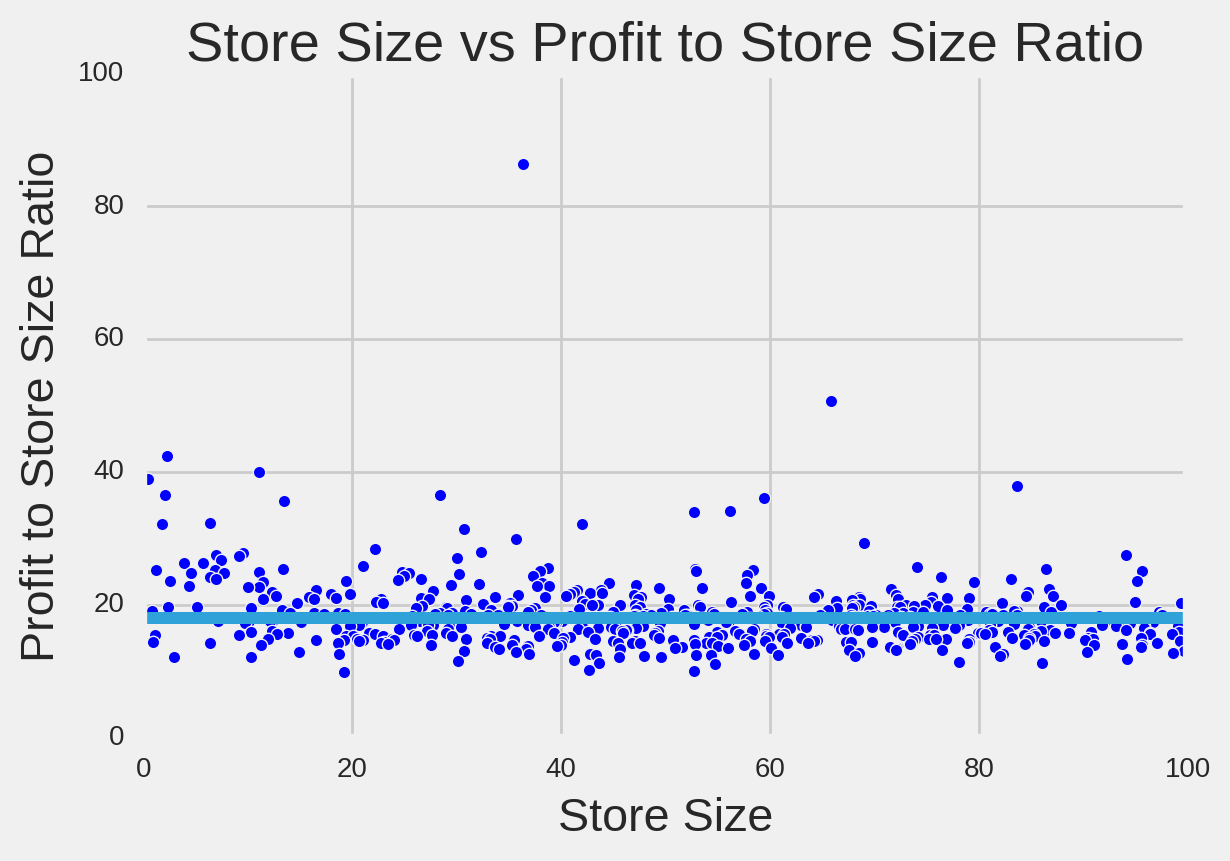

In [44]:
# Linear Model for Profit to Store Size Ratio to Store Size
l1_ratios = np.linspace(0.01, 1.0, 5)
lm = linear_model.ElasticNetCV(l1_ratio=l1_ratios, n_alphas=10, cv=5,
                            verbose=1)
X = iowa_2015_store_profitpergallon[["volumesoldgallons"]]
print len(X)
y = iowa_2015_store_profitpergallon[['profitstoresizeratio']]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)

plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Store Size")
plt.ylabel("Profit to Store Size Ratio")
plt.title("Store Size vs Profit to Store Size Ratio")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [74]:
# Creating a linear model looking at the relationship between store size and the ratio of profit to store size,
# the model shows that profit to store size ratio remains consistent as store size increases.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [39]:
# Create column for Broader Category for liquor type
iowa['broadcategory'] = iowa['categorynum'].astype(str).str[2]
iowa.loc[iowa.broadcategory == '1', 'broadcategory'] = 'whisky'
iowa.loc[iowa.broadcategory == '2', 'broadcategory'] = 'tequila'
iowa.loc[iowa.broadcategory == '3', 'broadcategory'] = 'vodka'
iowa.loc[iowa.broadcategory == '4', 'broadcategory'] = 'gin'
iowa.loc[iowa.broadcategory == '5', 'broadcategory'] = 'brandy'
iowa.loc[iowa.broadcategory == '6', 'broadcategory'] = 'rum'
iowa.loc[iowa.broadcategory == '7', 'broadcategory'] = 'cocktails'
iowa.loc[iowa.broadcategory == '8', 'broadcategory'] = 'liquer'

iowa.loc[iowa.categoryname == 'AMERICAN ALCOHOL', 'broadcategory'] = 'americanalcohol'

iowa.loc[iowa.categoryname == 'DECANTERS & SPECIALTY PACKAGES', 'broadcategory'] = 'decanters'
iowa.loc[iowa.categoryname == 'HIGH PROOF BEER - AMERICAN', 'broadcategory'] = 'beer'

iowa.loc[iowa.itemdes == 'Courvoisier Vsop Cognac', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == "D'usse VSOP", 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Grand Marnier Cordon Rouge', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Grand Marnier Raspberry Peach', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Hennessy Black', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Hennessy VS', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Hennessy VSOP Privilege', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Hennessy Vs Cognac', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Hennessy Vs Cognac 100ml', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Remy Martin VSOP', 'broadcategory'] = 'brandy'
iowa.loc[iowa.itemdes == 'Rothman & Winter Orchard Peach' , 'broadcategory'] = 'brandy'

iowa.loc[iowa.itemdes == 'Bombay Sapphire w/Glass', 'broadcategory'] = 'gin'

iowa.loc[iowa.itemdes == 'Disaronno Amaretto', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Disaronno Amaretto Cavalli Mignon 3-50ml Pack', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Domaine de Canton', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == "Dr. McGillicuddy's Apple Pie Mini", 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == "Dr. McGillicuddy's Peach", 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == "Dr. McGillicuddy's Peach Mini", 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Evan Williams Egg Nog', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Galliano Liqueur', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Giffard Creme de Pamplemousse Rose Pink Grapefruit Liqueur', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Il Tramonto Limoncello', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Licor 43', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Passoa Liqueur', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Ricura Mini', 'broadcategory'] = 'liquer'
iowa.loc[iowa.itemdes == 'Rothman & Winter Orchard Peach', 'broadcategory'] = 'liquer'

iowa.loc[iowa.itemdes == 'American Born Moonshine Apple Pie', 'broadcategory'] = 'moonshine'
iowa.loc[iowa.itemdes == 'American Born Moonshine Original', 'broadcategory'] = 'moonshine'
iowa.loc[iowa.itemdes == 'Ole Smoky Cherry Moonshine', 'broadcategory'] = 'moonshine'
iowa.loc[iowa.itemdes == "Tim Smith's Climax Moonshine", 'broadcategory'] = 'moonshine'

iowa.loc[iowa.itemdes == 'Blue Chair Bay Banana', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Blue Chair Bay Coconut', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Blue Chair Bay Coconut Spiced', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Captain Morgan Coconut', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Captain Morgan Coconut Mini', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Captain Morgan Grapefruit', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Captain Morgan Pineapple', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Captain Morgan Pineapple Mini', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == "Gosling's Black Seal", 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Leblon Cachaca' , 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Rondiaz Mini', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Rondiaz Rum Spiced', 'broadcategory'] = 'rum'
iowa.loc[iowa.itemdes == 'Rondiaz Rum Spiced Black Cherry Mini', 'broadcategory'] = 'rum'

iowa.loc[iowa.itemdes == '1800 Silver', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Casa Noble Reposado', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Exotico Blanco', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Exotico Reposado', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Herradura Gold Reposado 6pak', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Olmeca Altos Reposado', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Peligroso Silver', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Sauza Cien Anos Reposado', 'broadcategory'] = 'tequila'
iowa.loc[iowa.itemdes == 'Tres Generaciones Anejo', 'broadcategory'] = 'tequila'

iowa.loc[iowa.itemdes == 'Absolut w/Ginger Beer', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Belvedere Intense Unfiltered', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Belvedere Vodka', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Ciroc Ten HA', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Crystal Head Aurora Vodka', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Grey Goose w/2 Martini Glasses', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'High Stick Vodka', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'La Collection Santa Claus', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Pearl Caramel' , 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Pinnacle Candy Cane Trial Pack', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Stolichnaya Premium Vodka 80 Prf', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == "Stolichnaya Premium Vodka 80 Proof (lv)", 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Stolichnaya Russian Vodka 80 Prf', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Svedka', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Svedka Vodka', 'broadcategory'] = 'vodka'
iowa.loc[iowa.itemdes == 'Three Olives Cake Flavored Vodka', 'broadcategory'] = 'vodka'

iowa.loc[iowa.itemdes == 'Gentleman Jack w/2 Glasses', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Glenfiddich 1963 Replica HA', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Jack Daniels TN Honey & Jack Daniels TN Fire 750mls w/2Gls', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Knob Creek w/ Crystal Decanter', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Parkers Heritage Collection Malt Whiskey HA', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Southern Comfort w/Shot Glass & Lanyard', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Templeton Rye w/Flask', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Wild Turkey American Honey Shot Tap', 'broadcategory'] = 'whisky'
iowa.loc[iowa.itemdes == 'Woodford Reserve MC 1838 White Corn', 'broadcategory'] = 'whisky'

In [77]:
# Looking at the category number, it is possible to see that the third digit identifies the type of alcohol.
# Using this, I create a broad category based on alcohol type. Additionally, for observations with missing 
# category numbers and category names, I observe the item description using this to identify the type of 
# alcohol. I create the following categories: American Alcohol, Beer, Brandy, Cocktails, Decanters, Gin,
# Liwuers, Moonshine, Rum, Tequila, Vodka, Whisky. I will consider dropping Decanters as we are not
# interested in this and Beer as there are only 2 observations. 

### 5.6 Do relationships exist between the broader liquor type and profit?

In [40]:
# Create a dataframe summing up total profit and volume sold in gallons by broad category and category name
iowa_broadcategory_categoryname_profitsizeratio = iowa.groupby(['broadcategory', 'categoryname'])['totalprofit', 'volumesoldgallons'].sum().reset_index()

# Create a variable calculating profit per gallon
iowa_broadcategory_categoryname_profitsizeratio['profitpergallon'] = iowa_broadcategory_categoryname_profitsizeratio['totalprofit'] / iowa_broadcategory_categoryname_profitsizeratio['volumesoldgallons']

# Create a dataframe summing up total profit and volume sold in gallons by broad category
iowa_broadcategory_profitsizeratio = iowa.groupby(['broadcategory'])['totalprofit', 'volumesoldgallons'].sum().reset_index()
iowa_broadcategory_profitsizeratio['profitpergallon'] = iowa_broadcategory_profitsizeratio['totalprofit'] / iowa_broadcategory_profitsizeratio['volumesoldgallons']

# Create a dataframe calculating average profit per gallon by broad category and category name
iowa_broadcategory_meanprofit = iowa.groupby(['broadcategory', 'categoryname'])['profitpergallon'].mean().reset_index()
iowa_broadcategory_profitsizeratio

,broadcategory,totalprofit,volumesoldgallons,profitpergallon
0,americanalcohol,2.555254e+04,1144.76,22.321308
1,beer,9.518000e+01,0.40,237.950000
2,brandy,5.246473e+05,20568.57,25.507230
3,cocktails,1.922263e+05,21891.50,8.780864
4,decanters,9.606450e+04,3436.88,27.951078
5,gin,3.066445e+05,18223.45,16.826916
6,liquer,1.873011e+06,92840.33,20.174540
7,moonshine,5.631770e+03,156.08,36.082586
8,rum,1.527528e+06,86928.96,17.572145
9,tequila,6.350565e+05,24657.60,25.754998


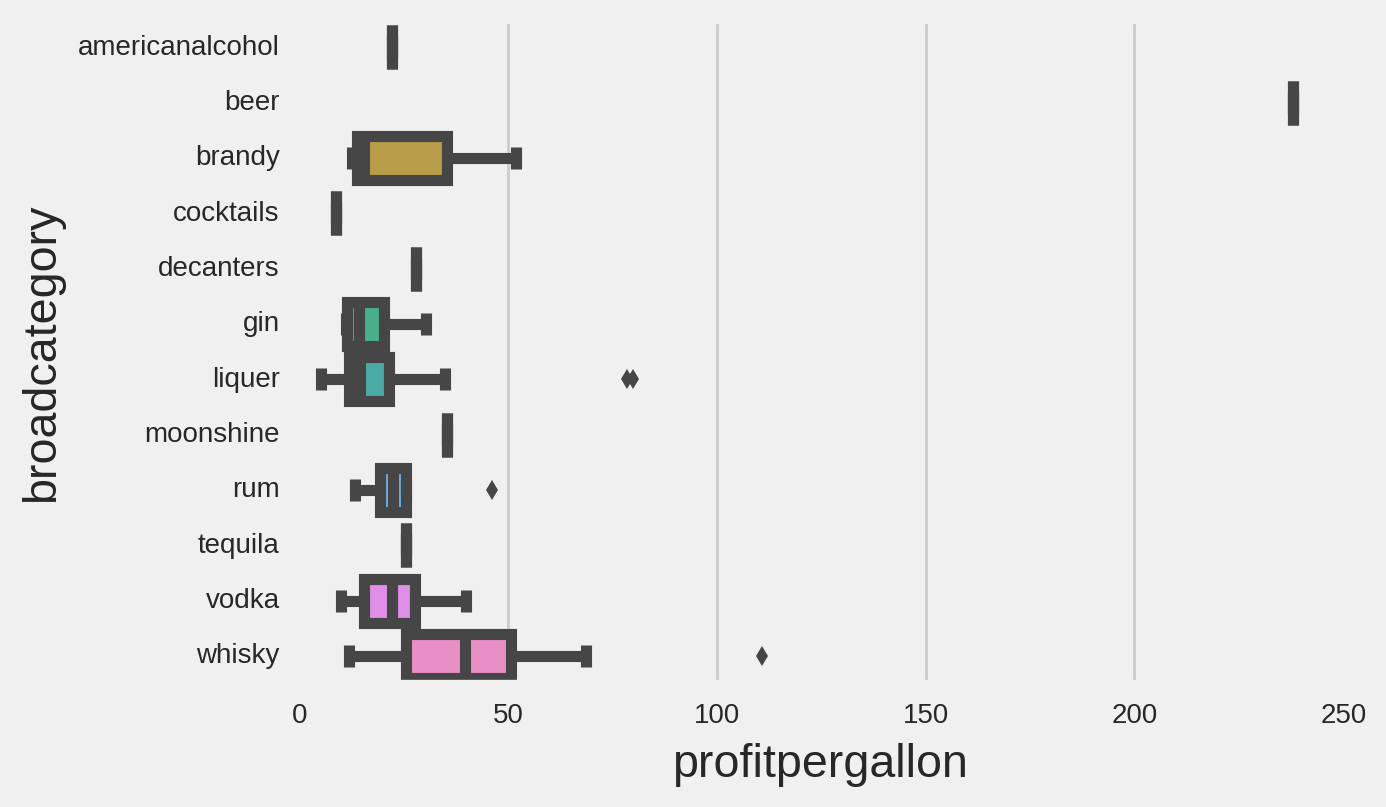

In [44]:
# Boxplot of Broad Category Type and Profit Per Gallon
ax = sns.boxplot(x="profitpergallon", y="broadcategory", data=iowa_broadcategory_categoryname_profitsizeratio)

In [78]:
# Creating a boxplot of broad category type and profit per gallon including category name so as to see observe
# different observations within these categories, it is possible to see that whisky has the highest mean 
# profit per gallon. However, there is overlap between the standard error bars. We can disregard beer and 
# moonshine as there are very few observations for these and decanters as we are not interested.


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [51]:
# Create a dataframe summing up total profit by year and county
iowa_broadcategory_itemdes_profitsizeratio = iowa.groupby(['broadcategory', 'itemdes'])['totalprofit', 'volumesoldgallons'].sum().reset_index()
iowa_broadcategory_itemdes_profitsizeratio.sort('totalprofit', ascending=False).head()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,broadcategory,itemdes,totalprofit,volumesoldgallons
1677,whisky,Black Velvet,536032.60,45126.01
1904,whisky,Jack Daniels Old #7 Black Lbl,396756.34,11404.08
942,rum,Captain Morgan Spiced Rum,388531.06,18042.95
582,liquer,Fireball Cinnamon Whiskey,304842.09,14928.17
1764,whisky,Crown Royal Canadian Whisky,269355.66,7620.15


In [52]:
iowa_broadcategory_itemdes_profitsizeratio.sort('volumesoldgallons', ascending=False).head()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,broadcategory,itemdes,totalprofit,volumesoldgallons
1677,whisky,Black Velvet,536032.60,45126.01
1299,vodka,Hawkeye Vodka,235236.20,29317.96
942,rum,Captain Morgan Spiced Rum,388531.06,18042.95
1275,vodka,Five O'clock Vodka,125606.38,15299.76
1204,vodka,Barton Vodka,113971.14,15079.99


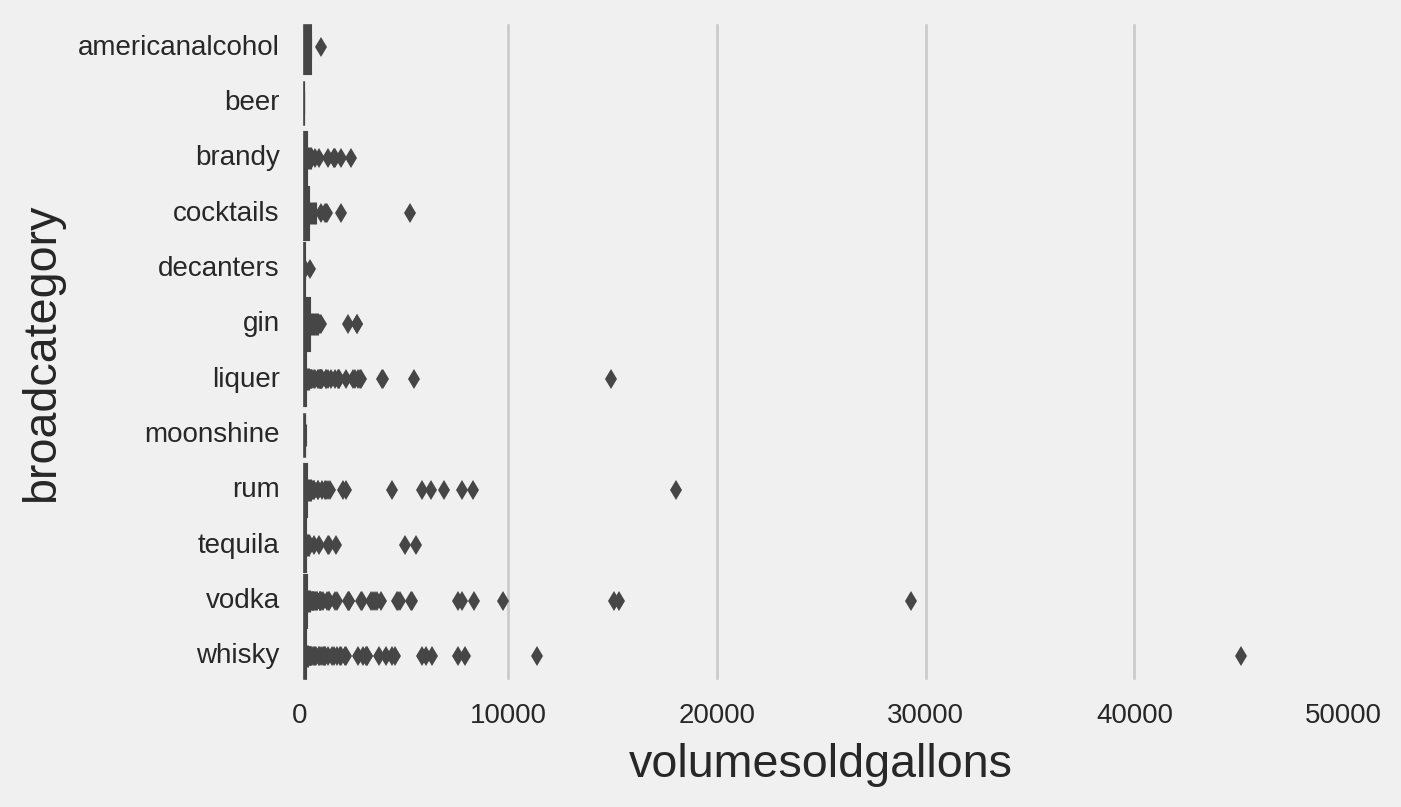

In [57]:
ax = sns.boxplot(x="volumesoldgallons", y="broadcategory", data=iowa_broadcategory_itemdes_profitsizeratio)

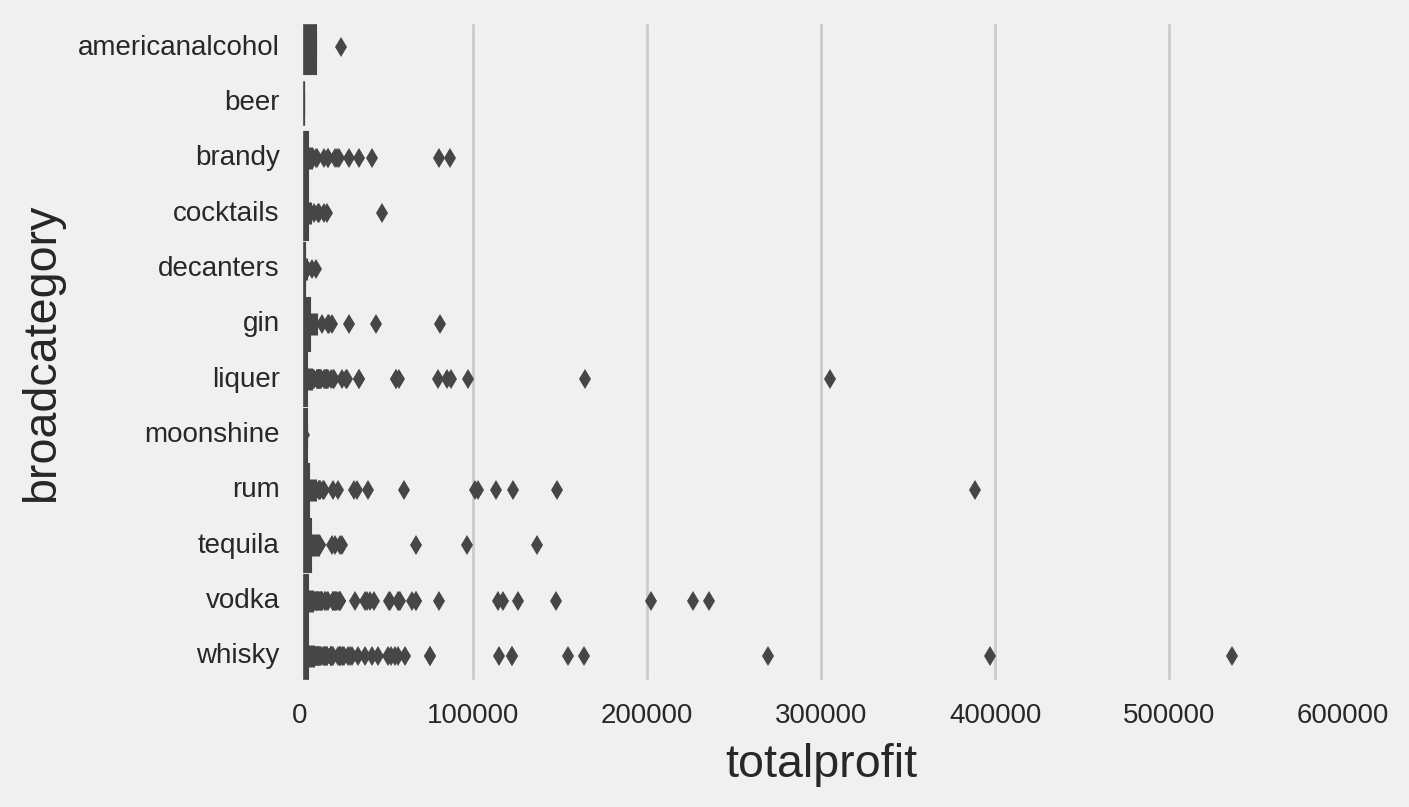

In [58]:
ax = sns.boxplot(x="totalprofit", y="broadcategory", data=iowa_broadcategory_itemdes_profitsizeratio)

In [53]:
# Using the above the dataframe, it is possible to observe the variance for each broad category across different
# item descriptions. We can infer that different item descriptions link up to different brands. We can see in
# the plots above the spread accross the different broadtypes for profit and volumes sold in gallons.

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [67]:
# Create a dataframe summing up volumes sold in gallons by store
iowa_store_volumesold_1 = iowa.groupby(['store'])['volumesoldgallons'].sum().reset_index()

# Rename columns
iowa_store_volumesold_1.columns =['store', 'totalvolumesold']

# Create a dataframe summing up volume of each type of alcohol sold in gallons by store
iowa_store_volumesold_2 = iowa.groupby(['store', 'broadcategory'])['volumesoldgallons'].sum().reset_index()

# Create a variable for volume of each type of alcohol sold
iowa_store_volumesold_2['americanalcoholvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['decantersvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['beervolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['whiskyvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['tequilavolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['vodkavolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['ginvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['brandyvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['rumvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['cocktailsvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['liquersvolumesold'] = iowa_store_volumesold_2['volumesoldgallons']
iowa_store_volumesold_2['moonshinevolumesold'] = iowa_store_volumesold_2['volumesoldgallons']

iowa_store_volumesold_2.loc[iowa.broadcategory != 'americanalcohol' , 'americanalcoholvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'decanters' , 'decantersvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'beer' , 'beervolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'whisky' , 'whiskyvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'tequila' , 'tequilavolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'vodka' , 'vodkavolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'gin' , 'ginvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'brandy' , 'brandyvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'rum' , 'rumvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'cocktails' , 'cocktailsvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'liquers' , 'liquersvolumesold'] = 0
iowa_store_volumesold_2.loc[iowa.broadcategory != 'moonshine' , 'moonshinevolumesold'] = 0

# Merge dataframes summing up total profit and summing up volumes sold in gallons
iowa_store_volumesold_3 = pd.merge(iowa_store_volumesold_1, iowa_store_volumesold_2, how='left', on=['store'])

# Drop duplicate and unneccessary variables 
iowa_store_volumesold_3.drop('broadcategory', axis=1, inplace=True)
iowa_store_volumesold_3.drop('volumesoldgallons', axis=1, inplace=True)
iowa_store_volumesold_3.drop('store', axis=1, inplace=True)

In [55]:
# Correlation of Volumes of Alcohol
iowa_store_volumesold_3.corr()

,totalvolumesold,americanalcoholvolumesold,decantersvolumesold,beervolumesold,whiskyvolumesold,tequilavolumesold,vodkavolumesold,ginvolumesold,brandyvolumesold,rumvolumesold,cocktailsvolumesold,liquersvolumesold,moonshinevolumesold
totalvolumesold,1.000000,0.121367,0.018462,NaN,0.291762,0.098393,0.270824,0.076278,0.164110,0.269636,0.116975,NaN,-0.005233
americanalcoholvolumesold,0.121367,1.000000,-0.000548,NaN,-0.003610,-0.001543,-0.003368,-0.001502,-0.001248,-0.002134,-0.001436,NaN,-0.000292
decantersvolumesold,0.018462,-0.000548,1.000000,NaN,-0.004455,-0.001905,-0.004157,-0.001854,-0.001541,-0.002634,-0.001772,NaN,-0.000360
beervolumesold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whiskyvolumesold,0.291762,-0.003610,-0.004455,NaN,1.000000,-0.012546,-0.027379,-0.012212,-0.010149,-0.017348,-0.011675,NaN,-0.002372
tequilavolumesold,0.098393,-0.001543,-0.001905,NaN,-0.012546,1.000000,-0.011705,-0.005221,-0.004339,-0.007416,-0.004991,NaN,-0.001014
vodkavolumesold,0.270824,-0.003368,-0.004157,NaN,-0.027379,-0.011705,1.000000,-0.011394,-0.009469,-0.016185,-0.010893,NaN,-0.002213
ginvolumesold,0.076278,-0.001502,-0.001854,NaN,-0.012212,-0.005221,-0.011394,1.000000,-0.004223,-0.007219,-0.004858,NaN,-0.000987
brandyvolumesold,0.164110,-0.001248,-0.001541,NaN,-0.010149,-0.004339,-0.009469,-0.004223,1.000000,-0.005999,-0.004038,NaN,-0.000820
rumvolumesold,0.269636,-0.002134,-0.002634,NaN,-0.017348,-0.007416,-0.016185,-0.007219,-0.005999,1.000000,-0.006902,NaN,-0.001402


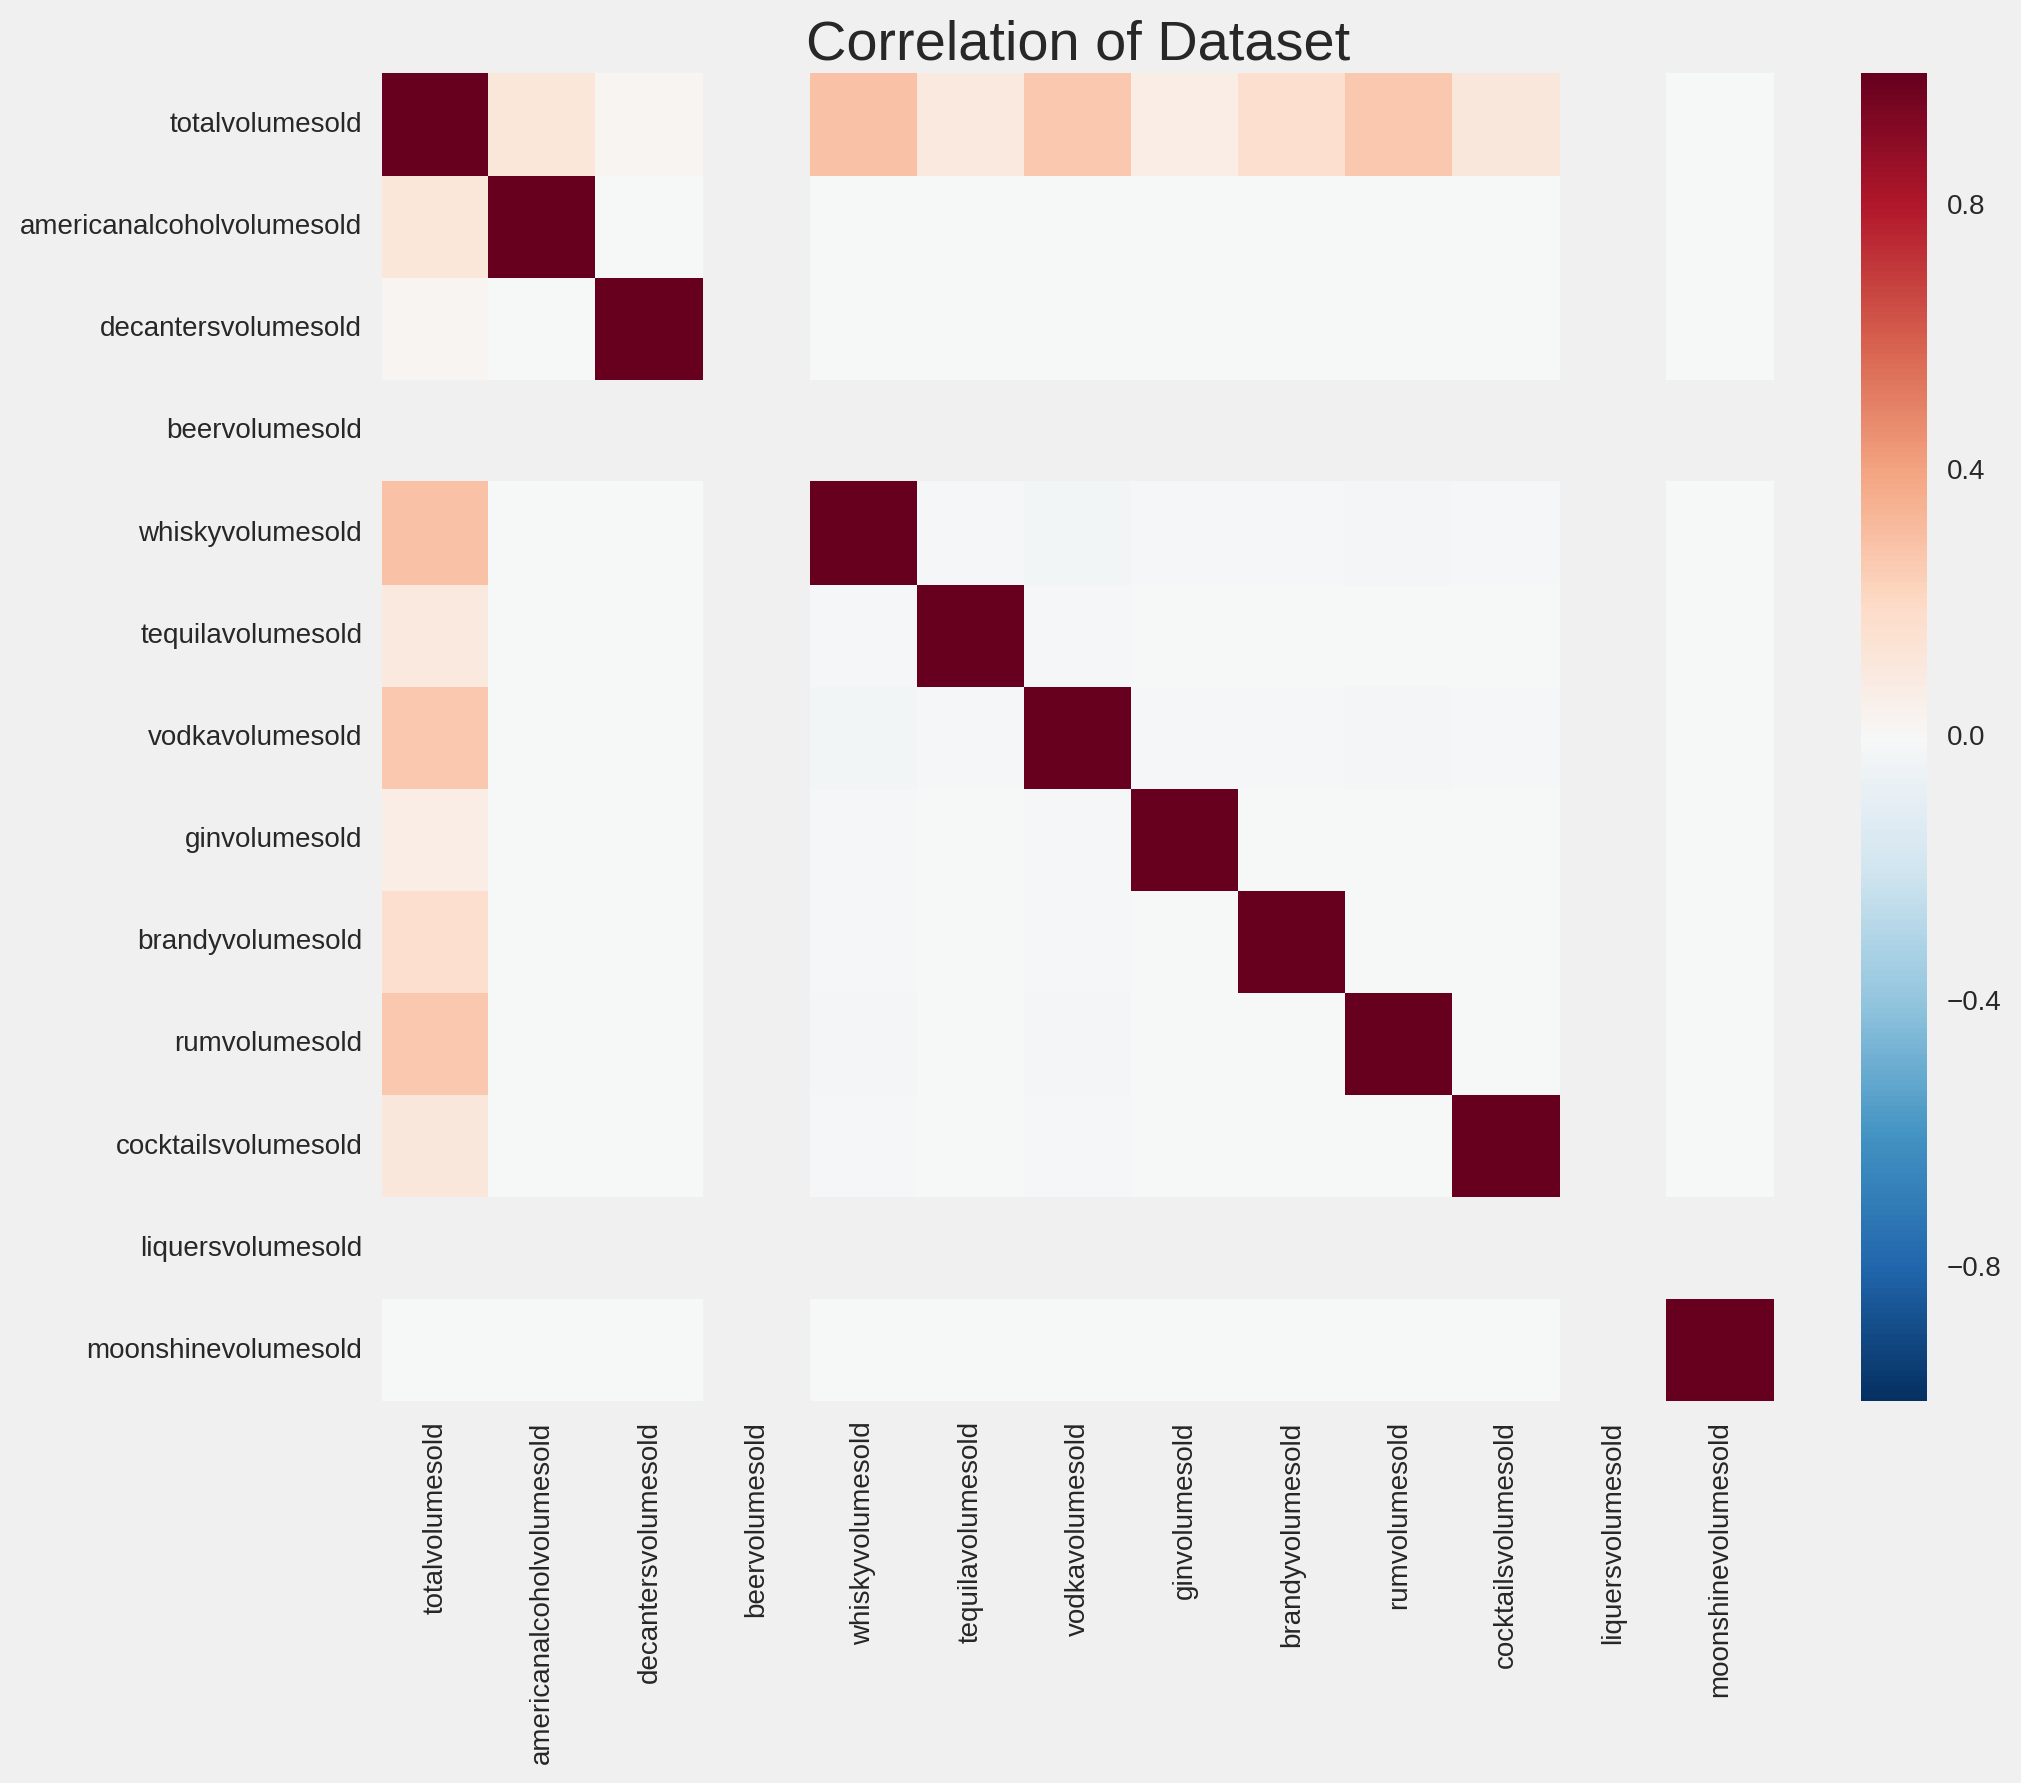

In [68]:
# Correlation Heat Map of Dataset
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title('Correlation of Dataset')
sns.heatmap(iowa_store_volumesold_3.corr(), ax=ax)
plt.show()

In [57]:
# Looking at the correlation heatmap of the dataframe, it is possible to observe that the variables that
# highly correlate with total volume sold are volume of whisy sold, volume of vodka sold, and volume of 
# rum sold. From this, we can infer that stores that are larger in size, based on total volume sold, 
# are likely to sell larger volumes of whisky, vodka, and rum. I can recommend to place a tax on whisky,
# vodka, and rum.

# ## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [58]:
# Create dataframes of Q1 sales in 2015
iowa_county_2015q1_totalsales = iowa_2015_q1.groupby(['countyname'])['saledollars'].sum().reset_index()

# Sort dataframe by total sales
iowa_county_2015q1_totalsales = iowa_county_2015q1_totalsales.sort('saledollars', ascending=False)

# Create dataframes of Q1 sales in 2016
iowa_county_2016q1_totalsales = iowa_2016_q1.groupby(['countyname'])['saledollars'].sum().reset_index()

# Sort dataframe by total sales
iowa_county_2016q1_totalsales = iowa_county_2016q1_totalsales.sort('saledollars', ascending=False)

# Merge dataframes summing up total profit and summing up volumes sold in gallons
iowa_county_2015q1_2016q1_totalsales = pd.merge(iowa_county_2015q1_totalsales, iowa_county_2016q1_totalsales, how='left', on=['countyname'])

# Renaming columns
iowa_county_2015q1_2016q1_totalsales.columns = ['county', '2015q1sales', '2016q1sales']

iowa_county_2015q1_2016q1_totalsales.head()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,county,2015q1sales,2016q1sales
0,Polk,1340375.51,509881.26
1,Linn,574464.38,210192.16
2,Scott,418415.27,170528.54
3,Black Hawk,340867.08,146621.73
4,Johnson,329701.17,137210.44


In [59]:
# The above dataframe shows total sales in Q1 of 2015 and Q2 of 2016 for each county.

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [60]:
# Create a dataframe of average Q1 sales in 2015 for stores in each county
iowa_county_2015q1_avgtotalsales_1 = iowa_2015_q1.groupby(['countyname', 'store'])['saledollars'].sum().reset_index()
iowa_county_2015q1_avgtotalsales_2 = iowa_2015_q1.groupby(['countyname'])['saledollars'].mean().reset_index()

# Create a dataframe of average Q1 sales in 2016 for stores in each county
iowa_county_2016q1_avgtotalsales_1 = iowa_2016_q1.groupby(['countyname', 'store'])['saledollars'].sum().reset_index()
iowa_county_2016q1_avgtotalsales_2 = iowa_2016_q1.groupby(['countyname'])['saledollars'].mean().reset_index()

# Merge dataframes summing up total profit and summing up volumes sold in gallons
iowa_county_2015q1_2016q1_avgtotalsales = pd.merge(iowa_county_2015q1_avgtotalsales_2, iowa_county_2016q1_avgtotalsales_2, how='left', on=['countyname'])

# Rename columns
iowa_county_2015q1_2016q1_avgtotalsales.columns = ['countyname', '2015q1sales', '2016q1sales']

# Sort by 2016 Q1 Sales
iowa_county_2015q1_2016q1_avgtotalsales = iowa_county_2015q1_2016q1_avgtotalsales.sort('2016q1sales', ascending=False)
iowa_county_2015q1_2016q1_avgtotalsales.head()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,countyname,2015q1sales,2016q1sales
23,Crawford,96.612844,355.714800
14,Cass,97.546667,180.461500
96,Woodbury,149.359327,166.064417
24,Dallas,204.904922,165.437680
27,Delaware,145.127257,159.200000


In [ ]:
# Initialy, I had looked at just the total sales in Q1 of 2015 and Q2 od 2015 for each county. However, it 
# makes more sense to observe the average total sales for stores for each county. Some counties may have many
# stores resulting in higher total sales. By this reasoning, I look at average total sales as this is more
# accurate for stores.

In [61]:
# Create a value for growth ratio from 2015 to 2016
iowa_county_2015q1_2016q1_avgtotalsales['growthinsales'] = iowa_county_2015q1_2016q1_avgtotalsales['2016q1sales'] / iowa_county_2015q1_2016q1_avgtotalsales['2015q1sales']

# Create dataframe sorted by growth
iowa_top20_growth = iowa_county_2015q1_2016q1_avgtotalsales.sort('growthinsales', ascending=False)
iowa_top20_growth = iowa_top20_growth.head(20)

# Normalize Q1 sales in 2015 and 2016
iowa_county_2015q1_2016q1_avgtotalsales['2015q1sales'] = iowa_county_2015q1_2016q1_avgtotalsales['2015q1sales'].fillna(0)
iowa_county_2015q1_2016q1_avgtotalsales['2016q1sales'] = iowa_county_2015q1_2016q1_avgtotalsales['2016q1sales'].fillna(0)

iowa_county_2015q1_2016q1_avgtotalsales['2015q1sales_norm'] = (iowa_county_2015q1_2016q1_avgtotalsales['2015q1sales'] - iowa_county_2015q1_2016q1_avgtotalsales['2015q1sales'].mean()) / iowa_county_2015q1_2016q1_avgtotalsales['2015q1sales'].std()
iowa_county_2015q1_2016q1_avgtotalsales['2016q1sales_norm'] = (iowa_county_2015q1_2016q1_avgtotalsales['2016q1sales'] - iowa_county_2015q1_2016q1_avgtotalsales['2016q1sales'].mean()) / iowa_county_2015q1_2016q1_avgtotalsales['2016q1sales'].std()

# Create dataframe sorted by Q1 sales in 2016
iowa_top20_q1sales = iowa_county_2015q1_2016q1_avgtotalsales.sort('2016q1sales_norm', ascending=False)
iowa_top20_q1sales = iowa_top20_q1sales.head(20)

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [62]:
iowa_top20_q1sales

,countyname,2015q1sales,2016q1sales,growthinsales,2015q1sales_norm,2016q1sales_norm
23,Crawford,96.612844,355.714800,3.681858,-0.180197,6.478074
14,Cass,97.546667,180.461500,1.850002,-0.151275,2.012300
96,Woodbury,149.359327,166.064417,1.111845,1.453417,1.645436
24,Dallas,204.904922,165.437680,0.807388,3.173723,1.629466
27,Delaware,145.127257,159.200000,1.096968,1.322346,1.470518
55,Lee,123.778483,155.273301,1.254445,0.661152,1.370459
90,Warren,134.014990,153.784625,1.147518,0.978187,1.332524
54,Kossuth,117.615764,147.341731,1.252738,0.470286,1.168348
76,Polk,148.880985,144.893794,0.973219,1.438603,1.105970
51,Johnson,134.352555,143.076580,1.064934,0.988642,1.059664


In [63]:
iowa_top20_growth

,countyname,2015q1sales,2016q1sales,growthinsales
23,Crawford,96.612844,355.714800,3.681858
14,Cass,97.546667,180.461500,1.850002
11,Butler,66.119296,121.191515,1.832922
17,Cherokee,72.338341,108.506338,1.499984
0,Adair,92.090090,127.910571,1.388972
3,Appanoose,84.133094,115.944103,1.378103
12,Calhoun,70.982533,94.538214,1.331852
85,Tama,67.868691,89.480238,1.318432
19,Clarke,85.151119,111.454762,1.308905
71,Osceola,80.263111,102.754375,1.280219


In [64]:
# Based on the dataframe of average total sales in Q1 of 2015 and Q1 of 2016, I create a variable looking at 
# growth between the two periods. I also look at normalized versions of this data. I create two dataframes, one
# of the top 20 counties in terms of growth and one of the top 20 counties in terms of average total sales. 
# From these two dataframes, I observe that the folowing counties are both top 20 in terms of growth and 
# average total sales: Crawford, Cass, Lee, Kossuth, Sioux, Fayette, Adair. Of these, I would recommend 
# Crawford and Cass as they both ranked number one and two respectively for both growth and average total
# sales. 

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [65]:
# Create a dataframe summing up total profit by year and county
iowa_county_volumesold_1 = iowa.groupby(['countyname'])['volumesoldgallons'].sum().reset_index()
iowa_county_volumesold_1 = iowa_county_volumesold_1.fillna(value=0)

# Create a variable for total volume of alcohol sold
iowa_county_volumesold_1['totalvolumesold'] = iowa_county_volumesold_1['volumesoldgallons']

# Create a dataframe summing up total profit by year and county
iowa_county_volumesold_2 = iowa.groupby(['countyname', 'broadcategory'])['volumesoldgallons'].sum().reset_index()
iowa_county_volumesold_2 = iowa_county_volumesold_2.fillna(value=0)

# Create a variable for volume of each type of alcohol sold
iowa_county_volumesold_2['americanalcoholvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['decantersvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['beervolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['whiskyvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['tequilavolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['vodkavolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['ginvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['brandyvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['rumvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['cocktailsvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['liquersvolumesold'] = iowa_county_volumesold_2['volumesoldgallons']
iowa_county_volumesold_2['moonshinevolumesold'] = iowa_county_volumesold_2['volumesoldgallons']

iowa_county_volumesold_2.loc[iowa.broadcategory != 'americanalcohol' , 'americanalcoholvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'decanters' , 'decantersvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'beer' , 'beervolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'whisky' , 'whiskyvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'tequila' , 'tequilavolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'vodka' , 'vodkavolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'gin' , 'ginvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'brandy' , 'brandyvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'rum' , 'rumvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'cocktails' , 'cocktailsvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'liquers' , 'liquersvolumesold'] = 0
iowa_county_volumesold_2.loc[iowa.broadcategory != 'moonshine' , 'moonshinevolumesold'] = 0

iowa_county_volumesold_3 = iowa_county_volumesold_2.groupby(['countyname'])['americanalcoholvolumesold', 'decantersvolumesold', 'beervolumesold', 'whiskyvolumesold', 'tequilavolumesold', 'vodkavolumesold', 'ginvolumesold', 'brandyvolumesold', 'rumvolumesold', 'cocktailsvolumesold', 'liquersvolumesold','moonshinevolumesold'].sum().reset_index()

# Merge dataframes summing up total profit and summing up volumes sold in gallons
iowa_county_volumesold_4 = iowa_county_volumesold_1.merge(iowa_county_volumesold_3, left_on='countyname', right_on='countyname', how='outer')

# Create a variable for percentage of volume of each type of alcohol sold
iowa_county_volumesold_4['americanalcoholpercentagesold'] = iowa_county_volumesold_4['americanalcoholvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['decanterspercentagesold'] = iowa_county_volumesold_4['decantersvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['beerpercentagesold'] = iowa_county_volumesold_4['beervolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['whiskypercentagesold'] = iowa_county_volumesold_4['whiskyvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['tequilapercentagesold'] = iowa_county_volumesold_4['tequilavolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['vodkapercentagesold'] = iowa_county_volumesold_4['vodkavolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['ginpercentagesold'] = iowa_county_volumesold_4['ginvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['brandypercentagesold'] = iowa_county_volumesold_4['brandyvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['rumpercentagesold'] = iowa_county_volumesold_4['rumvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['cocktailspercentagesold'] = iowa_county_volumesold_4['cocktailsvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['liquerspercentagesold'] = iowa_county_volumesold_4['liquersvolumesold'] / iowa_county_volumesold_4['totalvolumesold']
iowa_county_volumesold_4['moonshinepercentagesold'] = iowa_county_volumesold_4['moonshinevolumesold'] / iowa_county_volumesold_4['totalvolumesold']

In [66]:
# From the previous question, we can see that the most profitable is whisky, vodka, and rum.
# Above is a dataframe showing the average profit per gallon from diffferent alcohol types for each county.
# From this dataframe, we can infer which alcohol types are more profitable in theese counties.

In [69]:
iowa_crawford = iowa_county_volumesold_4.loc[iowa_county_volumesold_4.countyname == 'Crawford']
iowa_crawford.T

,23
countyname,Crawford
volumesoldgallons,3506.92
totalvolumesold,3506.92
americanalcoholvolumesold,0
decantersvolumesold,0
beervolumesold,0
whiskyvolumesold,27.8
tequilavolumesold,0
vodkavolumesold,411.27
ginvolumesold,0


In [70]:
iowa_cass = iowa_county_volumesold_4.loc[iowa_county_volumesold_4.countyname == 'Cass']
iowa_cass.T

,14
countyname,Cass
volumesoldgallons,2671.35
totalvolumesold,2671.35
americanalcoholvolumesold,0
decantersvolumesold,0
beervolumesold,0
whiskyvolumesold,786.8
tequilavolumesold,0
vodkavolumesold,373.28
ginvolumesold,2.38


In [ ]:
# Based on the above dataframes showing the information on amount of a type of liquor sold in Crawford and
# Cass county, we can see that vodka and whisky are still in demand in these areas.